In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import scipy.misc
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import datasets, layers, models, optimizers, regularizers
from keras.preprocessing.image import img_to_array, array_to_img, load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.externals import joblib
from keras.applications import imagenet_utils

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def load_dataset():
    train_dataset = h5py.File('/content/drive/My Drive/Datasets/SIRI-WHU/Train_SIRI-WHU.h5', 'r')
    train_set_x_orig = np.array(train_dataset["X_train_dataset"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["Y_train_dataset"][:]) # your train set labels

    test_dataset = h5py.File('/content/drive/My Drive/Datasets/SIRI-WHU/Test_SIRI-WHU.h5', 'r')
    test_set_x_orig = np.array(test_dataset["X_test_dataset"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["Y_test_dataset"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
# Loading the data (Dataset)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 1


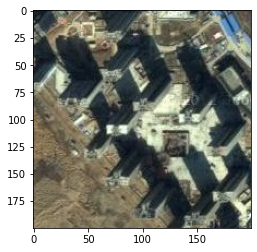

In [ ]:
index = 25
plt.imshow(Image.fromarray(X_train_orig[index].astype(np.uint8)))
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [ ]:
#X_train=np.zeros((1680,1024))
#X_test=np.zeros((420,1024))
#UCMLBP_Out = h5py.File('/content/drive/My Drive/Datasets/UCMerced_LandUse/Features/UCMerced_LandUse_LBP32SKI.h5', 'r')
#XXXXXT = np.array(UCMLBP_Out["X_train_dataset_LBP"][:])
#XXXXXS = np.array(UCMLBP_Out["X_test_dataset_LBP"][:])
#UCMLBP_Out.close()

#for i in range(X_train.shape[0]):
#  X_train[i]=XXXXXT[j].flatten()
#for j in range(X_test.shape[0]):
#  X_test[j]=XXXXXS[j].flatten()

Densnet_Out = h5py.File('/content/drive/My Drive/Datasets/SIRI-WHU/Convout/TLB1000/Desnet_Out.h5', 'r')
X_train = np.array(Densnet_Out["train_OutDesnet"][:])
X_test = np.array(Densnet_Out["test_OutDesnet"][:])
Densnet_Out.close()

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("X_test shape: " + str(X_test.shape))

number of training examples = 1920
number of test examples = 480
X_train shape: (1920, 1664)
X_test shape: (480, 1664)


In [ ]:
print(X_train[10])
index = 10
plt.imshow(Image.fromarray(XXXXXT[index].astype(np.uint8)))

[3.49370501e-04 2.90133205e-04 8.52058074e-05 ... 6.02668477e-03
 3.19932580e-01 1.17391884e+00]


NameError: ignored

In [ ]:
Resnet_Out = h5py.File('/content/drive/My Drive/Datasets/SIRI-WHU/Convout/TLB1000/Resnet_Out.h5', 'r')
Txtrain = np.array(Resnet_Out["train_OutResnet"][:])
Txtest = np.array(Resnet_Out["test_OutResnet"][:])
Resnet_Out.close()

print("Txtrain Shape:", Txtrain.shape)
print("Txtest Shape:", Txtest.shape)

Txtrain Shape: (1920, 2048)
Txtest Shape: (480, 2048)


In [ ]:
Xtrain = np.zeros((X_train_orig.shape[0],3712))
Xtest = np.zeros((X_test_orig.shape[0],3712))

for i in range(X_train_orig.shape[0]):
     Xtrain[i] = np.concatenate((Txtrain[i], X_train[i]), axis=0)

for j in range(X_test_orig.shape[0]):
     Xtest[j] = np.concatenate((Txtest[j], X_test[j]), axis=0)

print("Xtrain Shape:", Xtrain.shape)
print("Xtest Shape:", Xtest.shape)

Xtrain Shape: (1920, 3712)
Xtest Shape: (480, 3712)


In [ ]:
modelSVM = SVC(C=8, kernel='rbf', verbose=False, decision_function_shape='ovo', gamma=0.0009)
modelSVM.fit(Xtrain, Y_train_orig.T)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.0009, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predictionsSVMR = modelSVM.predict(Xtrain)
print('SVM Train ', accuracy_score(Y_train_orig.T, predictionsSVMR))
#print(confusion_matrix(Y_train_orig.T, predictionsSVMR))
#print(classification_report(Y_train_orig.T, predictionsSVMR))

predictionsSVMS = modelSVM.predict(Xtest)
print('SVM Test ', accuracy_score(Y_test_orig.T, predictionsSVMS))
#print(confusion_matrix(Y_test_orig.T, predictionsSVMS))
#print(classification_report(Y_test_orig.T, predictionsSVMS))

SVM Train  1.0
SVM Test  0.9583333333333334


In [ ]:
joblib.dump(modelSVM, '/content/drive/My Drive/Datasets/SIRI-WHU/Convout/TLB1000/ResDens_SVMmodel.pkl')

['/content/drive/My Drive/Datasets/SIRI-WHU/Convout/TLB1000/ResDens_SVMmodel.pkl']

In [ ]:
SVMsvd_model = joblib.load('/content/drive/My Drive/Datasets/SIRI-WHU/Convout/TLB1000/ResDens_SVMmodel.pkl')

In [ ]:
predictionsSVMR = SVMsvd_model.predict(Xtrain)
print('SVM Train ', accuracy_score(Y_train_orig.T, predictionsSVMR))
#print(confusion_matrix(Y_train_orig.T, predictionsSVMR))
#print(classification_report(Y_train_orig.T, predictionsSVMR))

predictionsSVMS = SVMsvd_model.predict(Xtest)
print('SVM Test ', accuracy_score(Y_test_orig.T, predictionsSVMS))
#print(confusion_matrix(Y_test_orig.T, predictionsSVMS))
#print(classification_report(Y_test_orig.T, predictionsSVMS))

SVM Train  1.0
SVM Test  0.9583333333333334


In [ ]:
epochs = len(Vhistory.history['loss'])
max_loss = max(max(Vhistory.history['loss']), max(Vhistory.history['val_loss']))
plt.axis([0, epochs+1, 0, round(max_loss * 2.0) / 2 + 0.5])
x = np.arange(1, epochs+1)
plt.plot(x, Vhistory.history['loss'])
plt.plot(x, Vhistory.history['val_loss'])
plt.title('Training loss vs. Validtion loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validate'], loc='right')
plt.show()

In [ ]:
epochs = len(Vhistory.history['accuracy'])
plt.axis([0, epochs+1, 0, 1.2])
x = np.arange(1, epochs+1)
plt.plot(x, Vhistory.history['accuracy'])
plt.plot(x, Vhistory.history['val_accuracy'])
plt.title('Training accuracy vs. Validate accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validate'], loc='right')
plt.show()